# Assignment 5.3: Visualize!

Grayson Hineline

Note for portfolio: The Assignment 5 projects involved just finding and visualizing some data in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 2.3: Some really nice plots

The following is some data on NBA players I got from a practice pandas course.

In [2]:
nbadf = pd.read_csv("nba.csv", ).dropna()
nbadf

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0


Gotta change the height from strings to something I can use.

In [3]:
nbadf["Height"]

0       6-2
1       6-6
3       6-5
6       6-8
7       7-0
       ... 
449     6-8
451     6-6
452    6-10
453     6-3
456     7-0
Name: Height, Length: 364, dtype: object

In [4]:
row = "6-2"
inches = int(row[1:].lstrip('-'))
inches = inches + (int(row[0])*12)
inches

74

In [5]:
def convertToInches(row):
    inches = int(row[1:].lstrip('-'))
    inches = inches + (int(row[0])*12)
    return inches

In [6]:
nbadf["Height"] = nbadf["Height"].apply(convertToInches)
nbadf

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,74,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,78,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,77,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,80,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,84,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,80,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,78,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,82,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,75,203.0,Butler,2433333.0


What I wanted to do is explore relationships between player position, salary, and height.

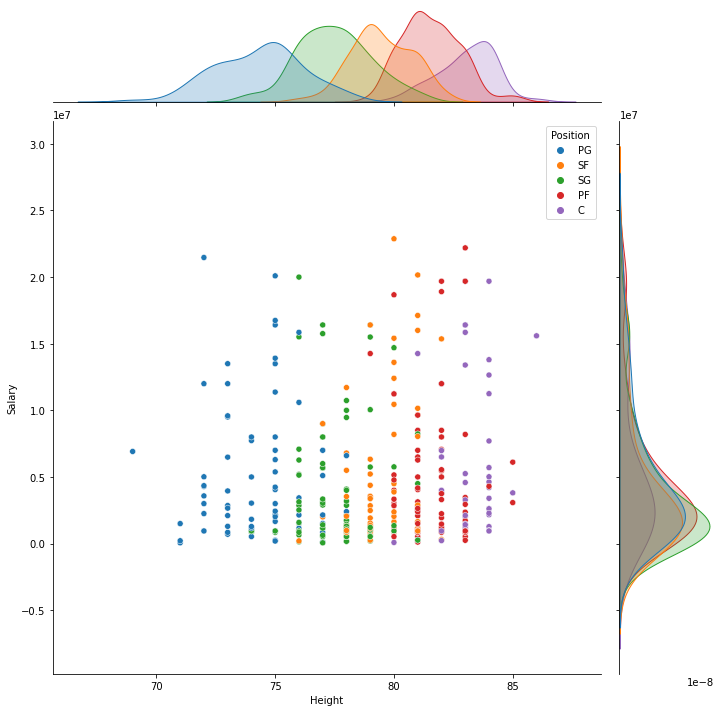

In [7]:
sns.jointplot(data = nbadf, x = "Height", y = "Salary", hue = "Position", height = 10)

I was originally going to do this, but exploring a plot like this is just like what I did for my first graph, and I don't want to just repeat that. However, I do want to say that it's interesting that there doesn't seem to be a strong relationship between player height and salary. I would have thought taller players would be in higher demand, and therefore be paided more.

However, what I can do is show the distribution of heights according to player positions.

I tried so hard to get the players salaries put into boxplots on the same plot as the player heights, but between getting the data in the right format in the dataframe, getting a second scale on the opposite y-axis to be right, and actually plotting the data, I arrived nowhere after a good couple hours of screwing around with it. Going on 10 hours on this lab, I'm just going to make it a simple plot.

Text(0, 0.5, 'Player Height (inches)')

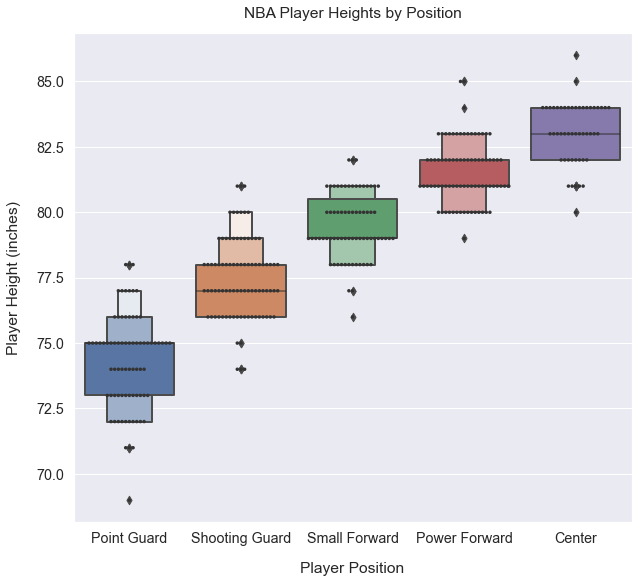

In [8]:
sns.set_theme(font_scale = 1.3, rc = {'figure.figsize':(10,9)})
plot = sns.boxenplot(data = nbadf, 
                   x = "Position", y = "Height", width = .8, linewidth = 2, 
                   order = ["PG", "SG", "SF", "PF", "C"])
plot = sns.swarmplot(data = nbadf, 
                   x = "Position", y = "Height", 
                   order = ["PG", "SG", "SF", "PF", "C"], color = ".2", size = 3.5)

plot.set_xticklabels(["Point Guard","Shooting Guard", "Small Forward", "Power Forward", "Center"])
plot.set_title("NBA Player Heights by Position", pad = 15)
plot.set_xlabel("Player Position", labelpad = 16)
plot.set_ylabel("Player Height (inches)", labelpad = 15)

My goal here was to be able to compare the distributions of players heights in each position in the NBA, such that the reader could make clear distinctions between the different player position heights.

Design Choices:
-	I chose to do boxen plots rather than histograms or a density plot because since there are 5 different subsections of the data I am trying to be able to compare, and therefore plotting all of the distributions on top of each other with histograms or density plots would make interpreting the differences between the groups difficult. For example, if you take a look at the joint plot I fiddled with a couple cells above, you can see that although the 5 distributions look neat stacked on top of each other, it is easier to compare their distributions with the boxen plots without sacrificing too much.
-	I added the swarm plot on top of it such that the reader can see the actual amounts of players in each position at each height. Since the data set is not too large, putting this extra data on the plot works without adding too much clutter.
-	The changing of the theme, font size, labels, and size of the plot were all made to make the graphic clearer to read, bigger, and easier to interpret. I changed the color and sizing of the swarmplot points to make sure that they could be seen clearly inside the boxen plots. The reasoning for using the default seaborn theme was again to decrease the amount of effort the reader has to use to compare the different box plots, as the default seaborn theme adds the gridlines.

Things to notice in the data:
-	Positions that have to play close to the net (small forward, power forward and center) are all generally taller than those that don’t play as close to the net.
-	Point guard looks to be normally distributed in heights, but with a wider range than the other positions. Interesting how shooting guard has just a couple players shorter than the first quartile. Center's heights look a little negatively scewed.
-	Every group has a few outliers. Look at that point guard who is under 70 inches (about 5 feet, 11 inches)… He plays against guys who are almost 7 feet tall!
